# Boosting Algorithm: Adaptive Boosting Method (AdaBoost)

Rafiq Islam  
2024-12-02

## Introduction

Boosting is a powerful ensemble learning technique that focuses on
improving the performance of weak learners to build a robust predictive
model. <br> <br> Now the question is what the heck is weak learner?
Well, roughly speaking, a statistical learning algorithm is called a
weak learner if it is slightly better than just random guess. In
contrast, a statistical learning algorithm is called a strong learner if
it can be made arbitrarily close to the true value.<br> <br> Unlike
bagging (bootstrap aggregating, e.g. random forest), which builds models
independently, boosting builds models sequentially, where each new model
corrects the errors of its predecessors. This approach ensures that the
ensemble concentrates on the difficult-to-predict instances, making
boosting highly effective for both classification and regression
problems.

### Key Characteristics of Boosting:

1.  **Sequential Model Building:** Boosting builds one model at a time,
    with each model improving upon the errors of the previous one.
2.  **Weight Assignment:** It assigns weights to instances, emphasizing
    misclassified or poorly predicted ones in subsequent iterations.
3.  **Weak to Strong Learners:** The goal of boosting is to combine
    multiple weak learners (models slightly better than random guessing)
    into a strong learner.

### Mathematical Visualization

Before writing the formal algorithm, let’s do some math by hand. Say, we
have a toy dataset:

| $x_1$ | $x_2$ | y   |
|-------|-------|-----|
| 1     | 2     | 1   |
| 2     | 1     | 1   |
| 3     | 2     | -1  |
| 4     | 3     | -1  |

Here:

-   $x_1$ and $x_2$ are features.
-   $y$ is the target label, with values $+1$ or $-1$.

Now, let’s apply the AdaBoost algorithm step-by-step using this dataset.

#### Iteration 1

*Step 1: Initialize Weights*  
Initially, all data points are assigned equal weights: $$
w_i^{(1)} = \frac{1}{N} = \frac{1}{4} = 0.25
$$

Weights: $w = [0.25, 0.25, 0.25, 0.25]$.

*Step 2: Train Weak Learner*

Suppose we use a decision stump (a simple decision rule) as the weak
learner. The first decision stump might split on $x_1$ as:

-   Predict $+1$ if $x_1 \leq 1.5$, otherwise $-1$.

$$
h_1(x) = 
\begin{cases} 
+1 & \text{if } x_1 \leq 1.5 \\ 
-1 & \text{otherwise}
\end{cases}
$$

Note, that even though we are deciding based on the feature $x_1$,
however, for $h_1(x)$ learner, $x$ is the row from the data set,
i.e. $x=[x_1, x_2]$. Therefore, for $h_1(x_1)$ would mean that, we are
feeding first row to the learner $h$ at iteration 1.

*Step 3: Evaluate Weak Learner*

Predictions for the dataset: $$
h_1(x) = [1, -1, -1, -1]
$$

But our true labels are $[1,1,-1,-1]$. So the error

$$
\epsilon_1 = \frac{\sum_{i=1}^{4}w_i^1 \mathbb{1}(y_i\ne h_1(x_i))}{\sum_{i=1}^{4}w_i^1}
$$

where, $\mathbb{1}$ is an indicator function that equals 1 when the
prediction is incorrect and 0 otherwise. Therefore, in iteration 1:

$$
\epsilon_1 = \frac{0.25(0+1+0+0)}{1}=0.25
$$

*Step 4: Calculate $\alpha_1$*  
$$
\alpha_1 = \ln\left(\frac{1 - \epsilon_1}{\epsilon_1}\right) = 1.0986
$$

*Step 5: Update Weights:*

For each instance:

$$
   w_i^{(1)} = w_i^{(1)} \cdot \exp\left(\alpha_1 \cdot y_i \cdot h_1(x_i)\right)
$$

Now you may wonder how and from where we came up with this updating
rule? We will explain this update process in the next post, but for now
let’s just focus on the update.

Updated weights (before normalization): $$
[0.25, 0.75, 0.25, 0.25]
$$

Normalize to ensure the weights sum to 1:

$$
   w_i^{(1)} = \frac{w_i^{(1)}}{\sum w_i^{(1)}}
$$

Final normalized weights: $w = [0.17, 0.5, 0.17, 0.17]$. Notice that,
for the incorrect prediction, the weight increased and for the correct
prediction the weights decreased.

#### Iteration 2

Similarly, we proceed with second iteration with the following weak
learner:

$$
h_2(x) = \begin{cases}+1 & \text{if} x_2\le 1.5 \\ -1 & \text{otherwise}\end{cases}
$$

For this learner, the prediction

$$
h_2(x)= [-1, 1, -1, -1]
$$

where as the actual labels are $[1,1,-1,1]$. So, the error

$$
\epsilon_2 = \frac{0.17\times 1 + 0.5\times 0+0.17\times 0+0.17\times 0}{1} = 0.17
$$

and

$$
\alpha_2 = \ln\left(\frac{0.756}{0.244}\right) = 1.586
$$

Next, we update the weights

So, $w=[0.83,0.5,0.17,0.17]$ and after normalizing
$w=[0.50,0.3,0.10,0.10]$. The final ensemble model combines the weak
learners using their weights ($\alpha$):

$$
F(x) = \text{sign}\left(\alpha_1 \cdot h_1(x) + \alpha_2 \cdot h_2(x)\right)
$$

For the toy dataset:

1.  $\alpha_1 = 1.0986$, $h_1(x) = [1, -1, -1, -1]$
2.  $\alpha_2 = 1.586$, $h_2(x) = [-1, 1, -1, -1]$

Weighted predictions:

If we keep iterating this way, we will have

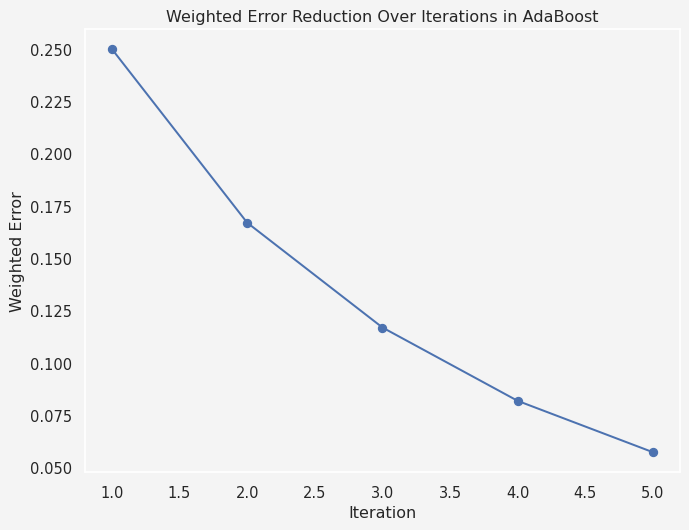

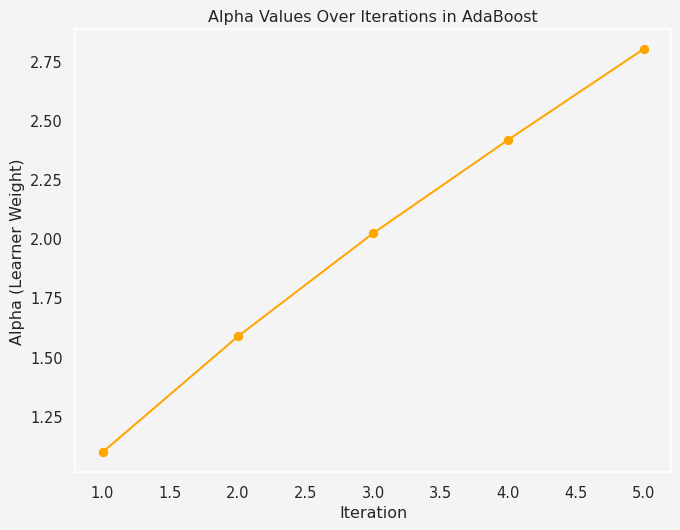

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from mywebstyle import plot_style
plot_style('#f4f4f4')

# Data points for visualization
iterations = [1, 2]
errors = [0.25, 0.167]  # Errors from the two iterations
alphas = [1.0968, 1.586]  # Alpha values for the weak learners

# Extend to further iterations
# Simulating error reduction and alpha calculation for a few more iterations
for i in range(3, 6):  # Iterations 3 to 5
    new_error = errors[-1] * 0.7  # Simulating decreasing errors
    errors.append(new_error)
    alphas.append( np.log((1 - new_error) / new_error))
    iterations.append(i)

# Plot weighted errors over iterations
plt.figure(figsize=(8, 6))
plt.plot(iterations, errors, marker='o')
plt.title("Weighted Error Reduction Over Iterations in AdaBoost")
plt.xlabel("Iteration")
plt.ylabel("Weighted Error")
plt.grid()
plt.show()

# Plot alpha values (importance of weak learners)
plt.figure(figsize=(8, 6))
plt.plot(iterations, alphas, marker='o', color='orange')
plt.title("Alpha Values Over Iterations in AdaBoost")
plt.xlabel("Iteration")
plt.ylabel("Alpha (Learner Weight)")
plt.grid()
plt.show()

## Adaptive Boosting (AdaBoost) Algorithm

Now it’s time to write the formal algorithm for Adaptive Boosting or
AdaBoost method. It is one of the earliest and most widely used boosting
algorithms. It was introduced by Freund and Schapire in 1996. AdaBoost
combines weak learners, typically decision stumps (single-level decision
trees), to form a strong learner.

| **Algorithm:** AdaBoost |
|------------------------------------------------------------------------|
| 1\. Initialize the observation weights $w_i=\frac{1}{N}$ for $i=1,2,\cdots, N$ <br> 2. For $m=1$ to $M$: <br>   (a) Fit a classifier $G_m(x)$ to the training data using weights $w_i$ <br>   (b) Compute <br>    $$err_m=\frac{\sum_{i=1}^{N}w_i\mathbb{1}(y_i\ne G_m(x_i))}{\sum_{i=1}^{N}w_i}$$<br>   (c) Compute $\alpha_m = \log\left(\frac{1-err_m}{err_m}\right)$<br>  (d) Set $w_i \rightarrow w_i\cdot \exp{\left[\alpha_m\cdot\mathbb{1}(y_i\ne G_m(x_i))\right]},\hspace{2mm} i=1,2,\cdots, N$<br> 3. Output $G(x)=\text{sign}\left[\sum_{m=1}^{M}\alpha_mG_m(x)\right]$ |

In the next posts, we will continue discussing on this algorithm,
specially the loss function, optimization techniques, advantages and
limitations of AdaBoost, and many other facts about this algorithm.

Thanks for reading this.

## Reference

-   Hastie, Trevor, Robert Tibshirani, and Jerome Friedman. “The
    elements of statistical learning: data mining, inference, and
    prediction.” (2017).

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/adaboost/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/adaboost/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/adaboost/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**